In [1]:
!pip install nltk

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import *
import pandas as pd
import math
from collections import Counter
import json
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
InputData=pd.read_csv("C://Users//Raval//Downloads//song.csv")

In [50]:
stemmer = PorterStemmer()
# a mapping dictionary that help remove punctuations
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def get_tokens(text):
  # turn document into lowercase
  lowers = text.lower()
  # remove punctuations
  no_punctuation = lowers.translate(remove_punctuation_map)
  # tokenize document
  tokens = nltk.word_tokenize(no_punctuation)
  # remove stop words
  filtered = [w for w in tokens if not w in stopwords.words('english')]
  # stemming process
  stemmed = []
  for item in filtered:
    stemmed.append(stemmer.stem(item))
  # final unigrams
  return stemmed

In [51]:
text_df=InputData["lyrics"]
stem_df=[]
for t in text_df:
    tokens=get_tokens(t)
    stem_df.append(tokens)
stem_df

[['alright',
  'might',
  'littl',
  'glare',
  'stare',
  'ho',
  'didnt',
  'know',
  'like',
  'stare',
  'right',
  'back',
  'nigga',
  'warnin',
  'comin',
  'react',
  'like',
  'mack',
  'act',
  'cool',
  'test',
  'caus',
  'aint',
  'jester',
  'suggest',
  'friend',
  'outti',
  'dont',
  'want',
  'make',
  'pal',
  'get',
  'rowdi',
  'doubt',
  'friendship',
  'lip',
  'touch',
  'go',
  'crazi',
  'clutch',
  'sorta',
  'like',
  'schitzo',
  'forget',
  'bro',
  'pal',
  'gal',
  'didnt',
  'mean',
  'fiend',
  'strang',
  'thing',
  'incomprehens',
  'denim',
  'matter',
  'who',
  'em',
  'grab',
  'flooz',
  'im',
  'traffic',
  'dont',
  'laugh',
  'might',
  'girl',
  'im',
  'talkin',
  'didnt',
  'mean',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  

In [52]:
sentence_df=[]
for stem in stem_df:
    sentence=""
    for word in stem:
        sentence=sentence+ " " +str(word)
    sentence_df.append(sentence)
sentence_df

[' alright might littl glare stare ho didnt know like stare right back nigga warnin comin react like mack act cool test caus aint jester suggest friend outti dont want make pal get rowdi doubt friendship lip touch go crazi clutch sorta like schitzo forget bro pal gal didnt mean fiend strang thing incomprehens denim matter who em grab flooz im traffic dont laugh might girl im talkin didnt mean aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught anoth incid went way beyond done john stop drawer drop didnt aint quittin realli didnt care who girl hittin admit skinz aint reason lose friend didnt know sorri accept apolog live gon na hold grudg well oh fudg new year fear action actin shi mean need smackin hoe instead tryin front know that exactli im goin know run game g know caus entertainin meant blame women makin ak seem call scr

In [53]:
len(sentence_df)

5471

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(sentence_df)
X_array = X.toarray()
X_array=pd.DataFrame(X_array)
print(X_array.shape)

(5471, 19465)


In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_array, InputData["label"], test_size=0.2, random_state=42)
X_train.shape

(4376, 19465)

   n_estimators  training accuracy  validation accuracy
0            10           0.990639             0.824658
1            25           0.998402             0.832877
2            50           1.000000             0.832877
3            75           1.000000             0.834703
4           100           1.000000             0.830137
5           125           1.000000             0.836530
6           150           1.000000             0.832877
7           175           1.000000             0.835616
8           200           1.000000             0.835616


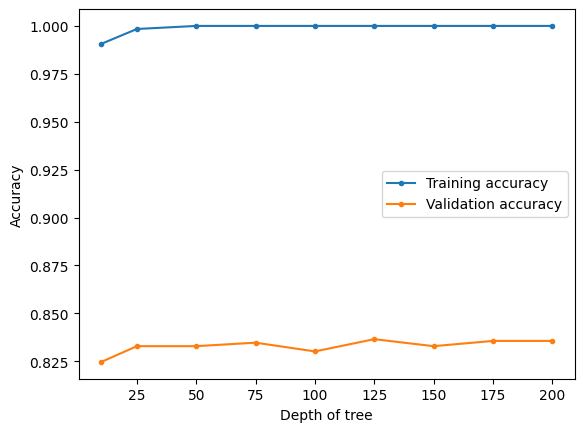

In [57]:
def rfc_parameter_tune_n_estimators(train_val_X, train_val_y):
    depths = [10, 25, 50, 75, 100, 125, 150,175,200]
    train_acc_all = []
    val_acc_all = []
    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]
            train_y = train_val_y.iloc[train_index]
            val_y = train_val_y.iloc[val_index]  
            rfc = ensemble.RandomForestClassifier(n_estimators=depth)
            rfc.fit(train_X, train_y)
            train_acc.append(rfc.score(train_X, train_y))
            val_acc.append(rfc.score(val_X, val_y))
        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)
    return depths, train_acc_all, val_acc_all
depths, train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_val, y_val)
kFold_df=pd.DataFrame()
kFold_df['n_estimators']=depths
kFold_df['training accuracy']=train_acc_all
kFold_df['validation accuracy']=val_acc_all
print(kFold_df)
plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()